<a href="https://colab.research.google.com/github/ShailendraSChauhan/DP100/blob/main/Penguin_MultiClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Penguin Multi-Classification**
- **Citation** -The penguins dataset used in the this exercise is a subset of data collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.
- **Data Set** - https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Load the dataset

!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv

penguin = pd.read_csv("penguins.csv")
penguin.head()

--2024-02-04 12:17:06--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7086 (6.9K) [text/plain]
Saving to: ‘penguins.csv.2’

penguins.csv.2      100%[===================>]   6.92K  --.-KB/s    in 0s      

2024-02-04 12:17:06 (70.1 MB/s) - ‘penguins.csv.2’ saved [7086/7086]



,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0


**EDA(Exploratory Data Analysis) of Dataset**

In [5]:
penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        344 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB


In [6]:
#Check null values
penguin.isnull().sum()

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64

In [8]:
#Rows which have null values
penguin[penguin.isnull().any( axis=1)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


In [9]:
#Drop the null values
penguin_data = penguin.dropna()

In [11]:
penguin_data.info()
penguin_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        342 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 16.0 KB


CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

In [14]:
penguin_class = ['Adelie', 'Gentoo', 'Chinstrap']
print(penguin_data.sample(10).columns[0:5].values, 'SpeciesName')

for index, row in penguin_data.sample(10).iterrows():
  print('[', row[0], row[1], row[2], row[3], row[4] ,']', penguin_class[int(row[4])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 36.4 17.0 195.0 3325.0 0.0 ] Adelie
[ 48.1 15.1 209.0 5500.0 1.0 ] Gentoo
[ 42.1 19.1 195.0 4000.0 0.0 ] Adelie
[ 38.6 21.2 191.0 3800.0 0.0 ] Adelie
[ 50.2 18.7 198.0 3775.0 2.0 ] Chinstrap
[ 45.2 17.8 198.0 3950.0 2.0 ] Chinstrap
[ 37.6 19.1 194.0 3750.0 0.0 ] Adelie
[ 49.1 14.5 212.0 4625.0 1.0 ] Gentoo
[ 46.9 16.6 192.0 2700.0 2.0 ] Chinstrap
[ 46.1 13.2 211.0 4500.0 1.0 ] Gentoo


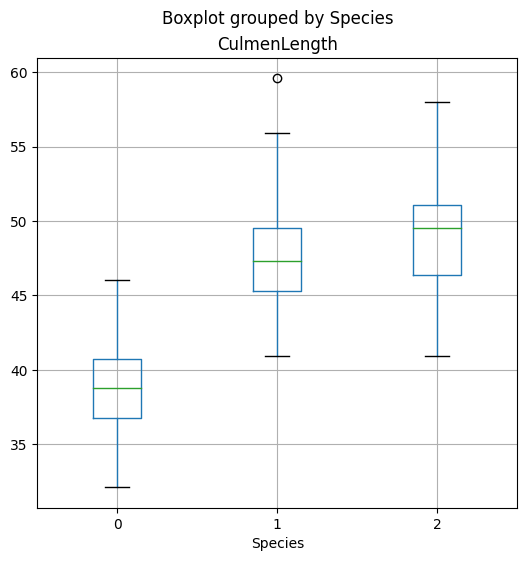

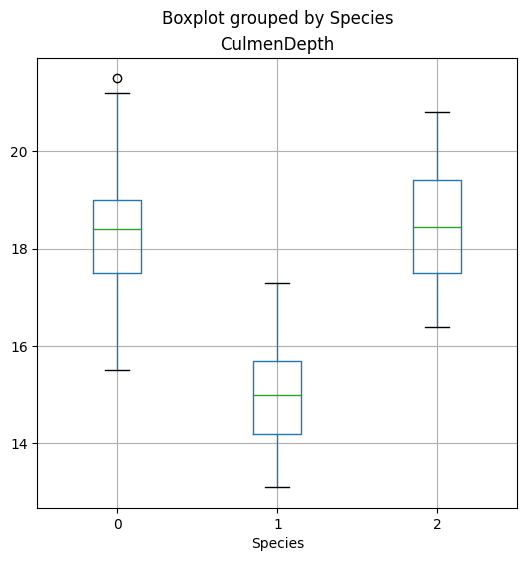

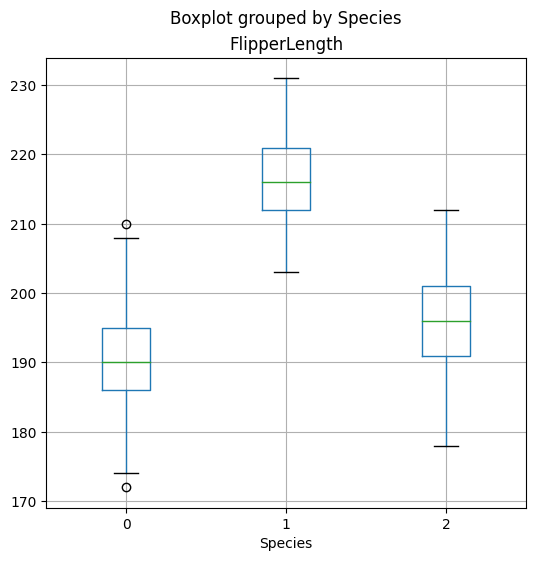

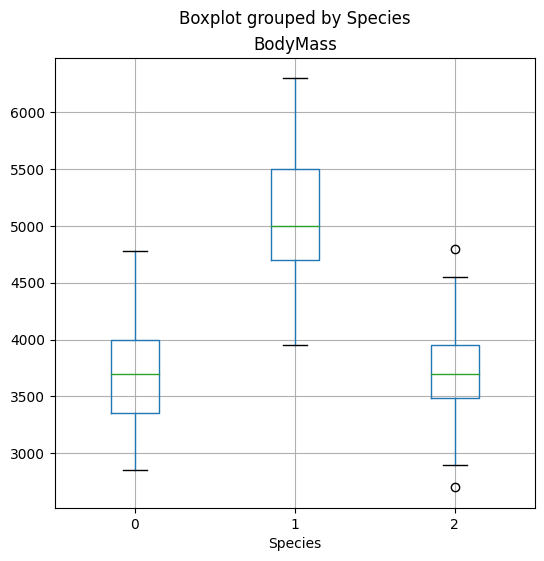

In [23]:
#Check the distribution of parameter of different Species
for col in penguin_data.columns[0:4]:
  penguin_data.boxplot(column= col, by ='Species', figsize=(6,6))

In [31]:
#Split the parameter into the Features and label
features = penguin_data.iloc[:,0:4]
label = penguin_data.iloc[:,4]
label

0      0
1      0
2      0
4      0
5      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: Species, Length: 342, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

X, y = features.values, label.values

#Split data into train and test
#Stratification techniques to maintain the proportion of label in test and train dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42, stratify= y)

print(f"Training set :{X_train.shape[0]} \n Test set: {X_test.shape[0]}")

Training set :239 
 Test set: 103


In [35]:
from sklearn.linear_model import LogisticRegression

#Set regularization
reg = 0.1

#Train the model
multi_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000).fit(X_train, y_train)
print(multi_model)

LogisticRegression(C=10.0, max_iter=10000)


In [41]:
#Predict the test data
prediction = multi_model.predict(X_test)
print("Preciction :", prediction[0:15])
print("    Actual :", y_test[0:15])

Preciction : [0 1 0 1 1 1 1 1 0 0 1 0 1 0 1]
    Actual : [0 1 0 1 1 1 1 1 0 0 1 0 1 0 1]


**Model Evaluation**

Confusion Matrix: 
 [[45  0  0]
 [ 0 37  0]
 [ 1  0 20]]

 Classification Report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      1.00      1.00        37
           2       1.00      0.95      0.98        21

    accuracy                           0.99       103
   macro avg       0.99      0.98      0.99       103
weighted avg       0.99      0.99      0.99       103

Accuracy : 0.9902912621359223
Overall Precision : 0.9927536231884058
Overall Recall : 0.9841269841269842


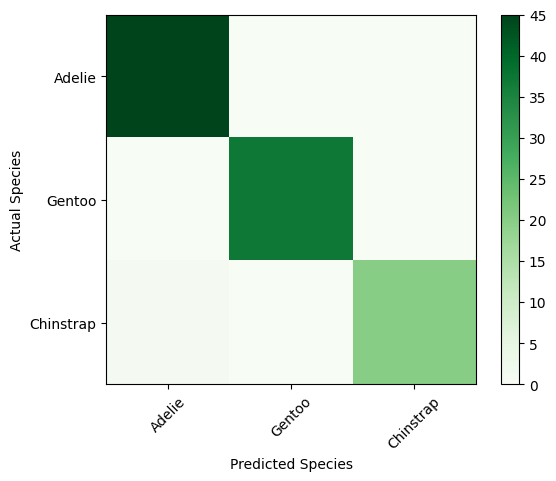

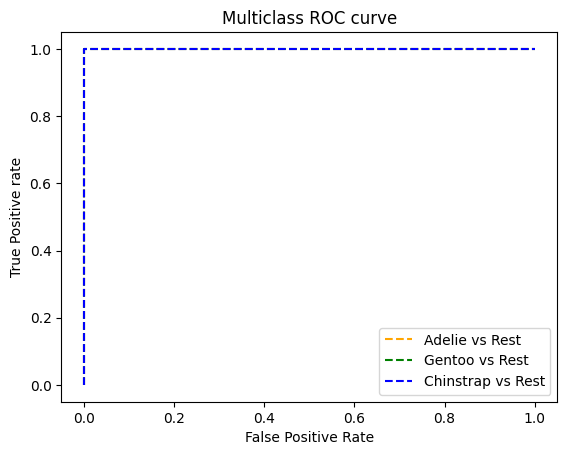

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

print("Confusion Matrix: \n", confusion_matrix(y_test, prediction))

print("\n Classification Report :\n", classification_report(y_test, prediction))

print("Accuracy :", accuracy_score(y_test, prediction))
print("Overall Precision :", precision_score(y_test, prediction, average='macro'))
print("Overall Recall :", recall_score(y_test, prediction, average='macro'))

#plot the Confusion matrix
plt.imshow(confusion_matrix(y_test, prediction), interpolation='nearest', cmap=plt.cm.Greens)
plt.colorbar()
tick_marks= np.arange(len(penguin_class))
plt.xticks(tick_marks, penguin_class, rotation=45)
plt.yticks(tick_marks, penguin_class)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

#Calculate class proability
prob = multi_model.predict_proba(X_test)

#Get ROC metrics for each class
fpr= {}
tpr= {}
thresh = {}

for i in range(len(penguin_class)):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob[:,i], pos_label=i)

# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=penguin_class[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=penguin_class[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=penguin_class[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [59]:
auc = roc_auc_score(y_test,prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 1.0


**Use Different Models - SVC**

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Define preprocessing for numeric columns (scale them)
feature_columns = [0,1,2,3]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', SVC(probability=True))])


# fit the pipeline to train a linear regression model on the training set
multi_model = pipeline.fit(X_train, y_train)
print (multi_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('regressor', SVC(probability=True))])


Confusion Matrix: 
 [[45  0  0]
 [ 0 37  0]
 [ 1  0 20]]

 Classification Report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      1.00      1.00        37
           2       1.00      0.95      0.98        21

    accuracy                           0.99       103
   macro avg       0.99      0.98      0.99       103
weighted avg       0.99      0.99      0.99       103

Accuracy : 0.9902912621359223
Overall Precision : 0.9927536231884058
Overall Recall : 0.9841269841269842


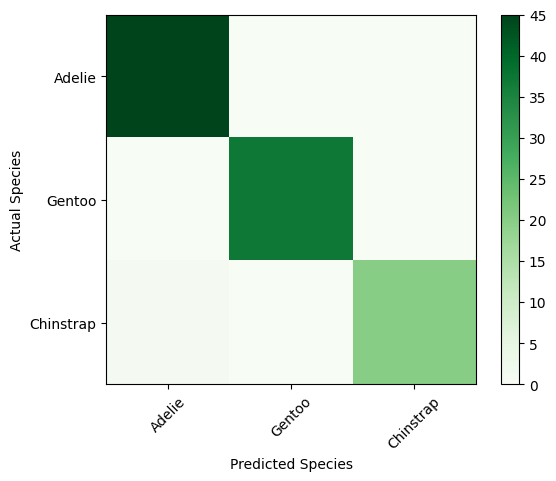

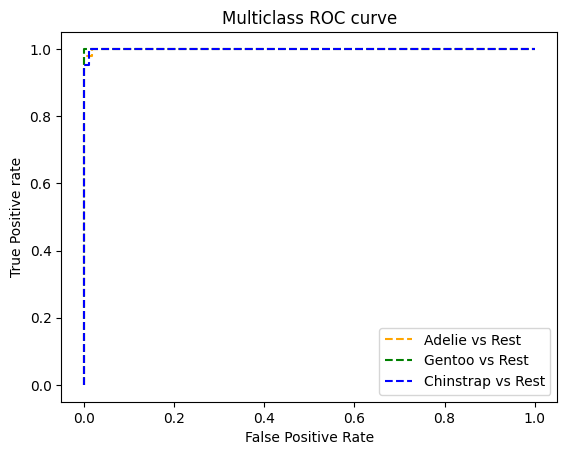

Average AUC: 0.9996787127148775


In [62]:
print("Confusion Matrix: \n", confusion_matrix(y_test, prediction))

print("\n Classification Report :\n", classification_report(y_test, prediction))

print("Accuracy :", accuracy_score(y_test, prediction))
print("Overall Precision :", precision_score(y_test, prediction, average='macro'))
print("Overall Recall :", recall_score(y_test, prediction, average='macro'))

#plot the Confusion matrix
plt.imshow(confusion_matrix(y_test, prediction), interpolation='nearest', cmap=plt.cm.Greens)
plt.colorbar()
tick_marks= np.arange(len(penguin_class))
plt.xticks(tick_marks, penguin_class, rotation=45)
plt.yticks(tick_marks, penguin_class)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

#Calculate class proability
prob = multi_model.predict_proba(X_test)

#Get ROC metrics for each class
fpr= {}
tpr= {}
thresh = {}

for i in range(len(penguin_class)):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob[:,i], pos_label=i)

# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=penguin_class[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=penguin_class[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=penguin_class[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

print('Average AUC:', roc_auc_score(y_test,prob, multi_class='ovr'))

In [63]:
import joblib

# Save the model as a pickle file
filename = './penguin_model.pkl'
joblib.dump(multi_model, filename)

['./penguin_model.pkl']

In [66]:
# Load the model from the file
multi_model = joblib.load(filename)

x_new = np.array([[40.5,18.4,195, 2600],
         [35.2,20.1,190,1900]])
print ('New samples:\n{}'.format(x_new))

# Call the web service, passing the input data
predictions = multi_model.predict(x_new)

# Get the predicted classes.
for prediction in predictions:
    print(prediction, '(' + penguin_class[prediction] +')')

New samples:
[[  40.5   18.4  195.  2600. ]
 [  35.2   20.1  190.  1900. ]]
0 (Adelie)
0 (Adelie)
